# Lecture 4  : Text Representation | Bag of Words | Tf-Idf | N-grams, Bi-grams and Uni-grams


https://www.youtube.com/watch?v=vo6gQz5lYRI&list=PLKnIA16_RmvZo7fp5kkIth6nRTeQQsjfX&index=4

### Common terms:


- Corpus - Total words present in dataset including duplicate words


- Vocabulary (v) - Total unique words from corpus


- Document - each individual rows is 1 document


- Word - Each word of a document

## One-hot Encoding : never use it

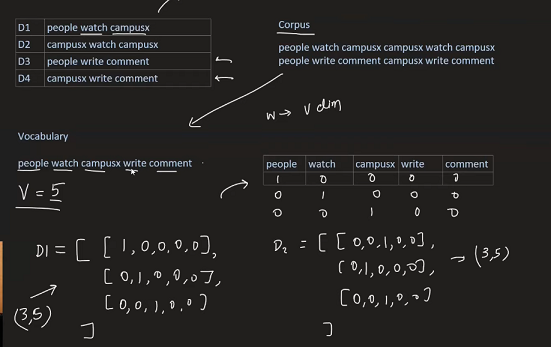

#### Disadvantage : 

- Sparsity




- no fixed size


- OOV : out of vocabulary - words in test data is not present in train data


- No capturing of semantic meaning

## Bag of words : used for Text classification

Bag of Words (BoW) is a simplified representation of text data that focuses on word frequencies and disregards the order or context of words. 

- counts each word comes how many times i.e counts frequency of each word


- similar output rows are considered to be similar


- order of words doesnot matter


- semantic meaning doesnot matter


- similarity is calculated using $cos\theta$

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv(r"D:\NLP\datasets\data1.csv")
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [39]:
X = df['text']
y = df['output']


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv = CountVectorizer()

In [43]:
bow = cv.fit_transform(X)

In [44]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [45]:
print(bow[0].toarray())

[[1 0 1 1 0]]


In [46]:
print(bow[1].toarray())

[[2 0 0 1 0]]


##### out of vocab words issue is solved here 

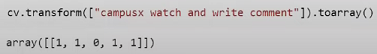

#### NOTE : for sentiment analysis binary hyperparameter of countvectorizer should be set as binary=True

### Advantages:


- simple and intuitive


- 

### Disadvantages:


- Sparsity


- OOV : new words will be set to 0 leading to losing its meaning


- ordering is lost

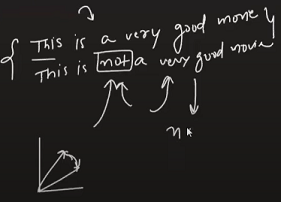

## N-grams


N-grams are contiguous sequences of n words in a text. They are used to __capture the context__ and relationships between words within a document or dataset.

### bi-grams (2,2)

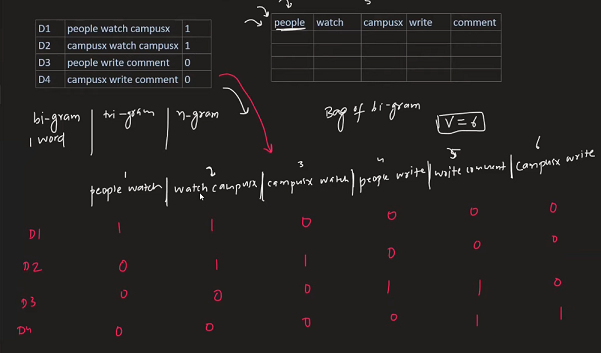

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv(r"D:\NLP\datasets\data1.csv")
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [23]:
X = df['text']
y = df['output']

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
cv = CountVectorizer(ngram_range=(2,2))

In [33]:
bow = cv.fit_transform(X)

In [34]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [35]:
print(bow[0].toarray())

[[0 0 1 0 1 0]]


In [36]:
print(bow[1].toarray())

[[1 0 0 0 1 0]]


### tri-grams

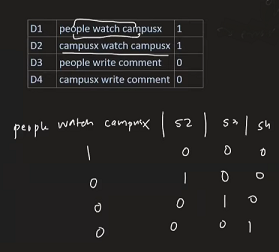

In [25]:
cv = CountVectorizer(ngram_range=(3,3))

In [26]:
bow = cv.fit_transform(X)

In [28]:
print(cv.vocabulary_)

{'people watch campusx': 2, 'campusx watch campusx': 0, 'people write comment': 3, 'campusx write comment': 1}


In [30]:
print(bow[0].toarray())

[[0 0 1 0]]


In [31]:
print(bow[1].toarray())

[[1 0 0 0]]


### Advantages:


- Captures context by considering word order.


- Provides efficient representation, reducing dimensionality.


- Preserves some word order information.


- Relatively easy to implement.

### Disadvantages of N-grams:

- Limited context window and potential data sparsity.


- Loss of word order beyond the chosen n-gram size.


- Vocabulary explosion with higher-order n-grams : When using higher-order n-grams, the number of possible combinations grows exponentially, resulting in a larger feature space. .


- Insensitivity to word variations : N-gram vectorization treats words as discrete units and does not account for word variations like different tenses, plural forms, or synonyms. .


- Lack of deep semantic understanding in word relationships.

## Tf-idf

document means row


TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical representation of the importance of a term in a document within a collection or corpus.

- __Term Frequency (TF):__ Measures the frequency of a term within a document. It indicates how often a term appears in a document relative to the total number of terms in that document.


- __Inverse Document Frequency (IDF):__ Measures the importance of a term in the entire collection or corpus. It gives higher weight to terms that are less frequent across documents in the corpus and lower weight to terms that are common.


- __TF-IDF:__ Combines the TF and IDF scores to calculate the overall importance of a term in a document. It is calculated by multiplying the TF of a term in a document by the IDF of that term in the corpus.

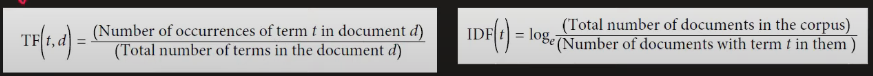

$$Tf*IDF$$

##### Tf-idf assigns different weightage to each word

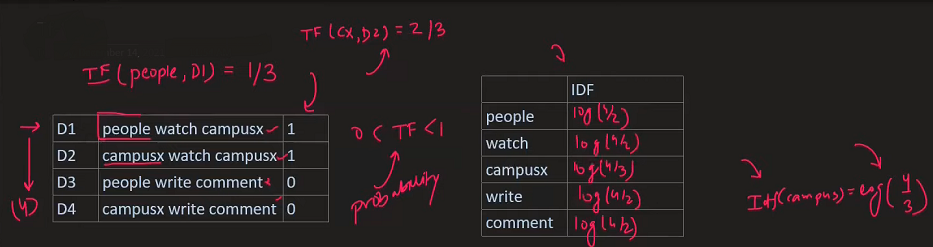

### NOTE : if a terms is very frequent then it's idf will be very less and if it is rare then the value will be higher.

#### tf-idf of each term :

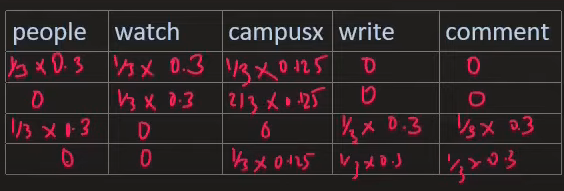

### example tf-idf : 

Suppose we have three documents:

Document 1: "The cat sat on the mat."


Document 2: "The dog chased the cat."


Document 3: "The cat and the dog are friends."

And we want to calculate the TF-IDF scores for the term "cat".

1. **Calculate Term Frequency (TF)**:
   - Term Frequency (TF) measures how often a term appears in a document.
   - For each document, we count the number of times the term appears and divide it by the total number of terms in the document.

   - TF for "cat" in each document:
     - Document 1: TF("cat") = 1/6
     - Document 2: TF("cat") = 1/6
     - Document 3: TF("cat") = 1/8

2. **Calculate Inverse Document Frequency (IDF)**:
   - Inverse Document Frequency (IDF) measures how important a term is across the entire corpus.
   - We calculate IDF by taking the logarithm of the total number of documents divided by the number of documents containing the term.

   - IDF for "cat":
     - Total number of documents: 3
     - Number of documents containing "cat": 2 (Document 1 and Document 2)

     - IDF("cat") = log(3/2) ≈ 0.1761

3. **Calculate TF-IDF**:
   - TF-IDF is the product of TF and IDF. It represents how important a term is in a specific document relative to its importance across all documents.

   - TF-IDF for "cat" in each document:
     - Document 1: TF-IDF("cat") = (1/6) * 0.1761 ≈ 0.0293
     - Document 2: TF-IDF("cat") = (1/6) * 0.1761 ≈ 0.0293
     - Document 3: TF-IDF("cat") = (1/8) * 0.1761 ≈ 0.0220

So, we've calculated the TF, IDF, and TF-IDF scores separately for the term "cat" in our example corpus. TF-IDF helps to identify the importance of a term within a document relative to its importance in the entire corpus.

In [14]:
df = pd.read_csv(r"D:\NLP\datasets\data1.csv")
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [15]:
X = df['text']
y = df['output']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf = TfidfVectorizer()

In [18]:
tfidf.fit_transform(X).toarray()


array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [19]:
print(tfidf.idf_)

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]


In [20]:
print(tfidf.get_feature_names_out())

['campusx' 'comment' 'people' 'watch' 'write']


### why do we add 1 in idf?

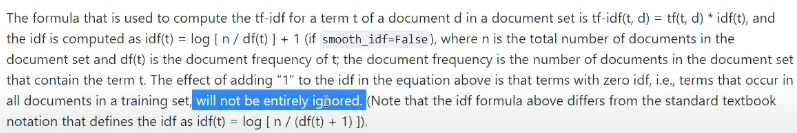

__The purpose of adding 1 to the document frequency is to avoid dividing by zero and to ensure that all terms, even those that are not present in any document, receive a non-zero IDF value. This helps prevent a potential issue where a term with zero IDF would dominate the TF-IDF score and incorrectly suggest high importance.__

### Why do we use log in idf?

The purpose of IDF is to measure the rarity or importance of a term in a document corpus. By taking the logarithm of the IDF value, we compress the range of possible IDF values and reduce the impact of extreme values.


The logarithm in the IDF calculation of TF-IDF helps normalize the scale of IDF values, reduces the impact of extreme values, and creates a more balanced representation of term importance across the document corpus.


### Advantages of TF-IDF:


- Used in information retrieval



- Considers term importance based on frequency and rarity.


- Reduces dimensionality of feature space.


- Language-independent.


- Versatile for various text analysis tasks.


### Disadvantages of TF-IDF:

- Lacks semantic understanding.


- Ignores word order.


- Sensitive to document length.


- Vocabulary mismatch may lead to information loss.


- Limited context understanding.

### Custom features

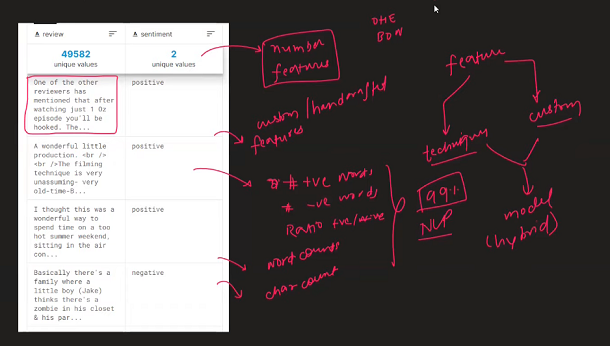